# Example script to read in data from the Outgassing Setup in WL110

### Import packages

#### General Packages

In [1]:
import numpy as np
import pandas as pd
import os

#### Plotting related packages and adjustments

In [2]:
import matplotlib.pyplot as plt

#### Custom packages

In [3]:
from data_io import DataIO # Custom IO file

### Suppress unimportant warnings

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Input/Output of RGA and Temperature Data

Define path where both the RGA files (as a .zip file) and the temperature data (as .csv files) is located.

In [5]:
Path = '/project/david_moore/aj487/Data_WL110/Outgassing_Setup/20201014/'

Initiate instance of IO class to read in data.

In [6]:
IO = DataIO(Path)

Unzip .zip file that contains all the RGA scans as .txt files in a temporary subdirectory called RGA/. 

In [7]:
IO.Unzip()

Read in the data from the RGA files. Size defined how many files should be read in. Default is -1 which will read in all the files.

In [8]:
RGA = IO.GetRGAData(Size=100)

Read in the temperature data.

In [9]:
Temp = IO.GetTemperatureData()

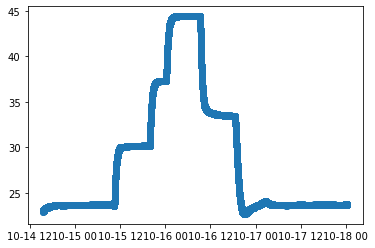

In [10]:
import matplotlib
dates = matplotlib.dates.date2num(Temp['Datetime'])
plt.plot_date(dates, Temp['CH1'])

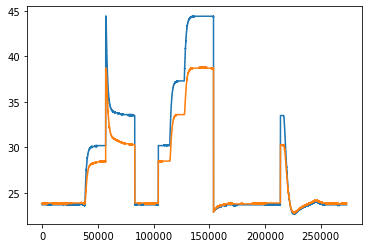

In [11]:
plt.plot(Temp.index, Temp['CH1'])
plt.plot(Temp.index, Temp['CH2'])

In [12]:
RGA.to_hdf('database.h5', 'RGA/', table=True, mode='a')
Temp.to_hdf('database.h5', 'Temp/', table=True, mode='a')

Remove temporary RGA/ subdirectory after having read-in all the data into pandas and saved as HDF5 file. 

In [13]:
# IO.RemoveZipDir()